<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/Covnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data

In [ ]:
tf.__version__

In [ ]:
(X_train_full, y_train_full),(X_test, y_test) = load_data()

In [15]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
y_train_full.shape

In [12]:
X_train, X_valid = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_train, y_valid = y_train_full[:5000], y_train_full[5000: ]

In [14]:
X_train.shape

(5000, 32, 32, 3)

In [24]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)),
    Dropout(0.3),
    Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3),
           ),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu', kernel_constraint=MaxNorm(3)),
    Dropout(0.5),
    Dense(10, activation='sigmoid')

                    ])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['sparse_categorical_accuracy']

)

model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 532ms/step - loss: 2.3878 - sparse_categorical_accuracy: 0.1220 - val_loss: 1.9802 - val_sparse_categorical_accuracy: 0.2792
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 495ms/step - loss: 1.8126 - sparse_categorical_accuracy: 0.3290 - val_loss: 1.6560 - val_sparse_categorical_accuracy: 0.4079
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 499ms/step - loss: 1.5527 - sparse_categorical_accuracy: 0.4489 - val_loss: 1.5341 - val_sparse_categorical_accuracy: 0.4489
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 490ms/step - loss: 1.3338 - sparse_categorical_accuracy: 0.5148 - val_loss: 1.4368 - val_sparse_categorical_accuracy: 0.4796
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 492ms/step - loss: 1.1636 - sparse_categorical_accuracy: 0.5887 - val_loss: 1.4353 - val_sparse_categorical_accuracy: 0.4889
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 489ms/step - loss: 1.0141 - sparse_categorical_accuracy: 0.6421 - val_loss: 1.3754 - val_sparse_categorical_ac

In [26]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,630,272 (48.18 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,420,182 (32.12 MB)

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 514.5946 - sparse_categorical_accuracy: 0.4397


[514.614990234375, 0.43309998512268066]

In [30]:
print(model.layers[0].kernel)

<Variable path=sequential_5/conv2d_12/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[-0.08417063  0.08252453  0.0472803  -0.1260404  -0.20328599
     0.19832692  0.15999468  0.00648848  0.03262646  0.00377947
    -0.03099018 -0.08705399  0.11680938 -0.05818766  0.16224451
    -0.07544981 -0.11397388  0.03818658 -0.10553378  0.0450396
     0.16361374 -0.05881181  0.00110623  0.18900447 -0.17114596
     0.0236752  -0.1837012  -0.05533945  0.18176463  0.03912325
     0.14962968  0.15603507]
   [ 0.05667983  0.07047404  0.11692031  0.02047819  0.07089753
    -0.01383582  0.13283256  0.21596022 -0.08862282  0.07875505
    -0.16433609 -0.03527718  0.08802184 -0.01597982  0.1241829
     0.04354682  0.17097354 -0.06500286 -0.07660229  0.14648014
    -0.20551053  0.11628664 -0.09095826  0.12084416 -0.06731581
     0.04054815 -0.0775504  -0.10604142 -0.0879491   0.08830172
    -0.06891801  0.16939524]
   [-0.01132209  0.0661544   0.00502303  0.01028041 -0.1476336
     0.20889387  0.066269

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


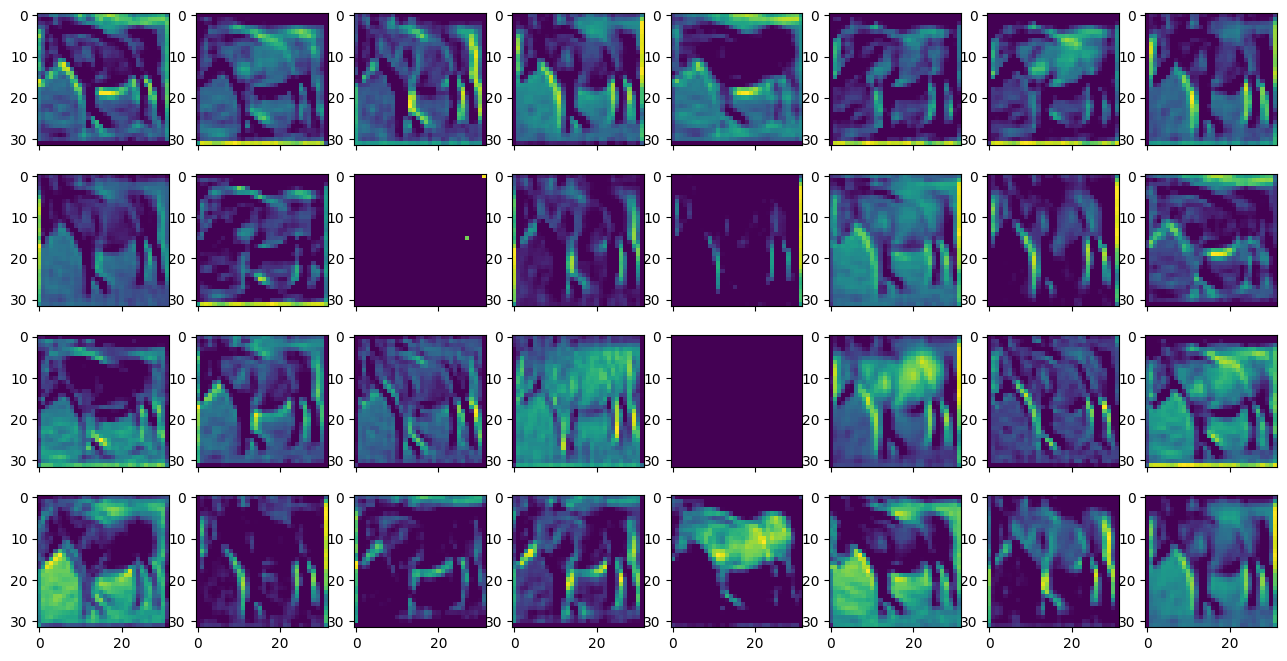

In [34]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train[7], 0))

#showing 32 features from the first layer
tf_features = features[0].numpy()[0]

fig, ax = plt.subplots(4, 8, sharex=True, sharey=False, figsize=(16, 8))
for i in range(0, 32):
  row, col = i//8, i%8
  ax[row][col].imshow(tf_features[..., i])

plt.show()

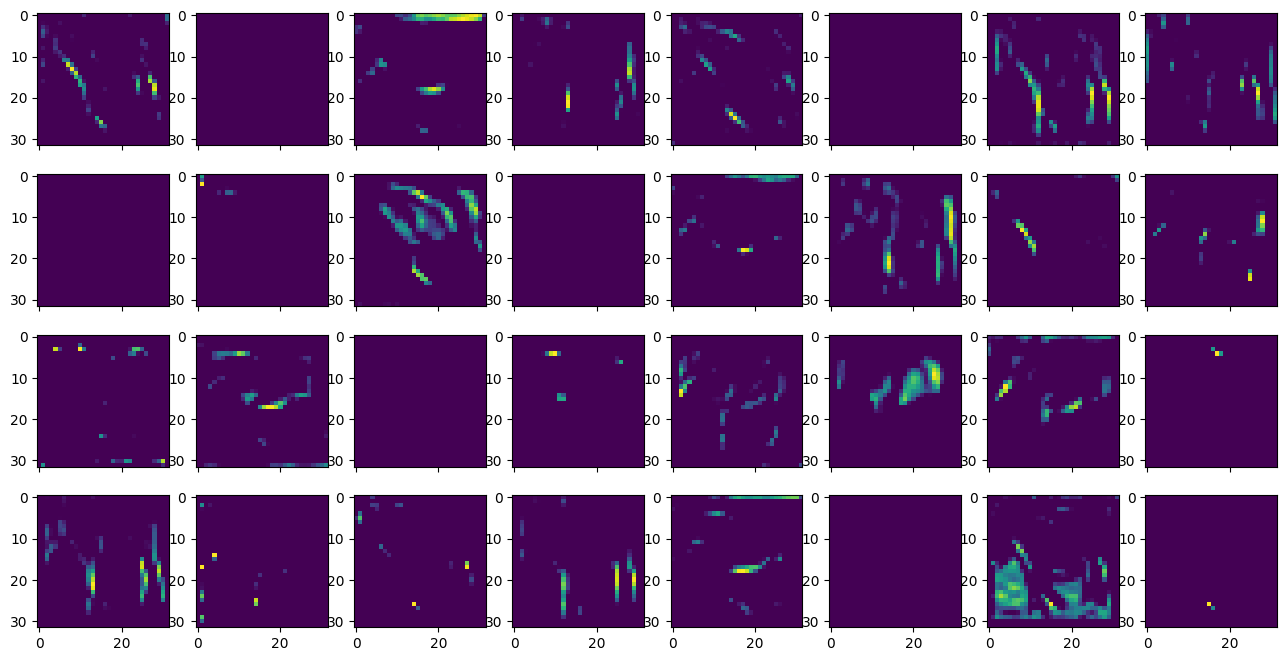

In [35]:
tf_features = features[2].numpy()[0]

fig, ax = plt.subplots(4, 8, sharex=True, sharey=False, figsize=(16, 8))
for i in range(0, 32):
  row, col = i//8, i%8
  ax[row][col].imshow(tf_features[..., i])

plt.show()
